In [1]:
import numpy as np 
import pandas as pd 
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as snsa
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('301.csv')
df.describe(include='all')

,Country,Latitude,Longitude,Language
count,6,6.000000,6.000000,6
unique,6,NaN,NaN,3
top,USA,NaN,NaN,English
freq,1,NaN,NaN,4
mean,NaN,38.971667,-9.531667,NaN
std,NaN,32.155820,86.523904,NaN
min,NaN,-25.450000,-103.770000,NaN
25%,NaN,45.415000,-73.232500,NaN
50%,NaN,48.950000,-0.065000,NaN
75%,NaN,53.295000,8.400000,NaN


In [12]:
from sklearn.preprocessing import LabelEncoder

# Convert 'language' column to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['language_numeric'] = label_encoder.fit_transform(df['Language'])
df.head(10)

,Country,Latitude,Longitude,Language,Cluster,language_numeric
0,USA,44.97,-103.77,English,1,0
1,Canada,62.40,-96.80,English,1,0
2,France,46.75,2.40,French,1,1
3,UK,54.01,-2.53,English,1,0
4,Germany,51.15,10.40,German,1,2
5,Australia,-25.45,133.11,English,0,0


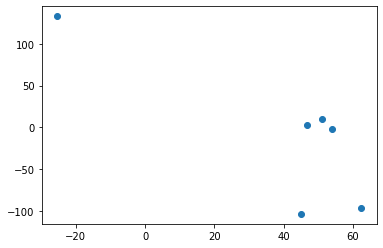

In [5]:
#Datei plotten
plt.plot(df['Latitude'], df['Longitude'], 'o')


In [ ]:
#Features auswählen
X = df[['Latitude', 'Longitude', "language_numeric"]]

Text(0, 0.5, 'WCSS')

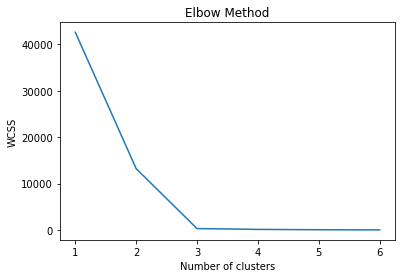

In [15]:
#Armbeugen Methode um die Anzahl der Cluster zu bestimmen
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

basierend auf dem Diagamm, 2 & 3 könnten beide die armbeugend sein. aber 3 ist die optimale Anzahl.

Text(0, 0.5, 'Longitude')

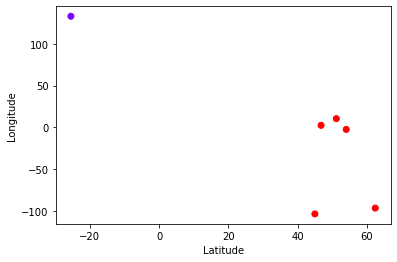

In [ ]:

#clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#Cluster Results
identified_clusters = kmeans.fit_predict(X)
df['Cluster'] = identified_clusters
#Cluster plotten
plt.scatter(df['Latitude'], df['Longitude'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

### Nateile der Kmeans
1. empfindlich zu Initialisierung der Zentren, wenn die Zentren zufällig gewählt werden, kann es sein, dass die Ergebnisse nicht konsistent sind.
das kann durch kmean++ gelöst werden, der einen vorläufigen iterativen Algorithmus verwendet, um die Zentren zu initialisieren.
2. empfindlich gegenüber Ausreißern, da die Zentren durch den Mittelwert der Punkte berechnet werden, können Ausreißer die Zentren stark beeinflussen. 
Das kann durch die Entfernung der Ausreißer gelöst werden
3. sphörische Cluster, kmeans funktioniert am besten, wenn die Cluster sphärisch sind, wenn die Cluster nicht sphärisch sind, kann es sein, dass die Ergebnisse nicht konsistent sind.
4. Anzahl der Cluster, die Anzahl der Cluster muss vorher festgelegt werden.
5. Skalierung, die Skalierung einer Variabel kann den Einfluss der Variabel reduzieren